In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Dữ liệu từng năm 2022 2023 2024
df_2022 = pd.read_csv('diem2022.csv')
df_2023 = pd.read_csv('diem2023.csv')
df_2024 = pd.read_csv('diem2024.csv')

In [3]:
# dữ liệu tổng 3 năm
df_all = pd.concat([df_2024,df_2023,df_2022], ignore_index=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079106 entries, 0 to 3079105
Data columns (total 17 columns):
 #   Column     Dtype  
---  ------     -----  
 0   sbd        int64  
 1   toan       float64
 2   ngu_van    float64
 3   ngoai_ngu  float64
 4   vat_li     float64
 5   hoa_hoc    float64
 6   sinh_hoc   float64
 7   lich_su    float64
 8   dia_li     float64
 9   gdcd       float64
 10  a00        float64
 11  a01        float64
 12  b00        float64
 13  d00        float64
 14  c00        float64
 15  tinh_thi   object 
 16  nam_thi    int64  
dtypes: float64(14), int64(2), object(1)
memory usage: 399.4+ MB


# Biểu đồ dạng cột về phổ điểm của từng khối:

## Khối A00: Toán, Lý, Hóa

In [4]:
stats_2022 = df_2022['a00'].agg(['mean', 'median', 'var'])
stats_2023 = df_2023['a00'].agg(['mean', 'median', 'var'])
stats_2024 = df_2024['a00'].agg(['mean', 'median', 'var'])
percentiles_2022 = df_2022['a00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2023 = df_2023['a00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2024 = df_2024['a00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])

# bar charts using matplotlib:
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
statistics = [stats_2022, stats_2023, stats_2024]
percentiles_list = [percentiles_2022, percentiles_2023, percentiles_2024]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20), facecolor='white')
fig.patch.set_facecolor('white')

for i, year in enumerate(years):
    df = data_frames[i]
    stats = statistics[i]
    percentiles = percentiles_list[i]
    ax = axes[i]
    ax.set_facecolor('white')

    # plot distribution
    n, bins, patches = ax.hist(df['a00'], bins=np.arange(0, 31, 0.5), edgecolor='black', alpha=0.7, color='gold')
    ax.set_title(f'{year}', fontsize=18)
    ax.set_xlabel('Điểm A00', fontsize=14)
    ax.set_ylabel('Số lượng học sinh', fontsize=14)
    ax.set_xticks(np.arange(0, 31, 0.5))
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    # num of students on bars
    for rect, count in zip(patches, n):
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(count)}', 
                    ha='center', va='bottom', fontsize=10, color='black')

    # legend
    textstr = (
        f"Mean: {stats['mean']:.2f}\n"
        f"Median: {stats['median']:.2f}\n"
        f"STD: {np.sqrt(stats['var']):.2f}\n"
    )
    for pct, score in percentiles.items():
        textstr += f"Top {int((1 - pct) * 100 + 0.00001)}%: {score:.2f}\n"

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.2, 0.6, textstr, transform=ax.transAxes, fontsize=18,
            verticalalignment='center', bbox=props)

plt.tight_layout()
plt.savefig('bar_a00.png', facecolor='white')
plt.show()


## Khối A01: Toán, Lý, Anh

In [6]:
stats_2022 = df_2022['a01'].agg(['mean', 'median', 'var'])
stats_2023 = df_2023['a01'].agg(['mean', 'median', 'var'])
stats_2024 = df_2024['a01'].agg(['mean', 'median', 'var'])
percentiles_2022 = df_2022['a01'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2023 = df_2023['a01'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2024 = df_2024['a01'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])

# bar charts using matplotlib:
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
statistics = [stats_2022, stats_2023, stats_2024]
percentiles_list = [percentiles_2022, percentiles_2023, percentiles_2024]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20), facecolor='white')
fig.patch.set_facecolor('white')

for i, year in enumerate(years):
    df = data_frames[i]
    stats = statistics[i]
    percentiles = percentiles_list[i]
    ax = axes[i]
    ax.set_facecolor('white')

    # plot distribution
    n, bins, patches = ax.hist(df['a01'], bins=np.arange(0, 31, 0.5), edgecolor='black', alpha=0.7, color='gold')
    ax.set_title(f'{year}', fontsize=18)
    ax.set_xlabel('Điểm A01', fontsize=14)
    ax.set_ylabel('Số lượng học sinh', fontsize=14)
    ax.set_xticks(np.arange(0, 31, 0.5))
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    # num of students on bars
    for rect, count in zip(patches, n):
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(count)}', 
                    ha='center', va='bottom', fontsize=10, color='black')

    # legend
    textstr = (
        f"Mean: {stats['mean']:.2f}\n"
        f"Median: {stats['median']:.2f}\n"
        f"STD: {np.sqrt(stats['var']):.2f}\n"
    )
    for pct, score in percentiles.items():
        textstr += f"Top {int((1 - pct) * 100 + 0.00001)}%: {score:.2f}\n"

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.2, 0.6, textstr, transform=ax.transAxes, fontsize=17,
            verticalalignment='center', bbox=props)

plt.tight_layout()
plt.savefig('bar_a01.png', facecolor='white')
plt.show()


## Khối B00: Toán, Hóa, Sinh

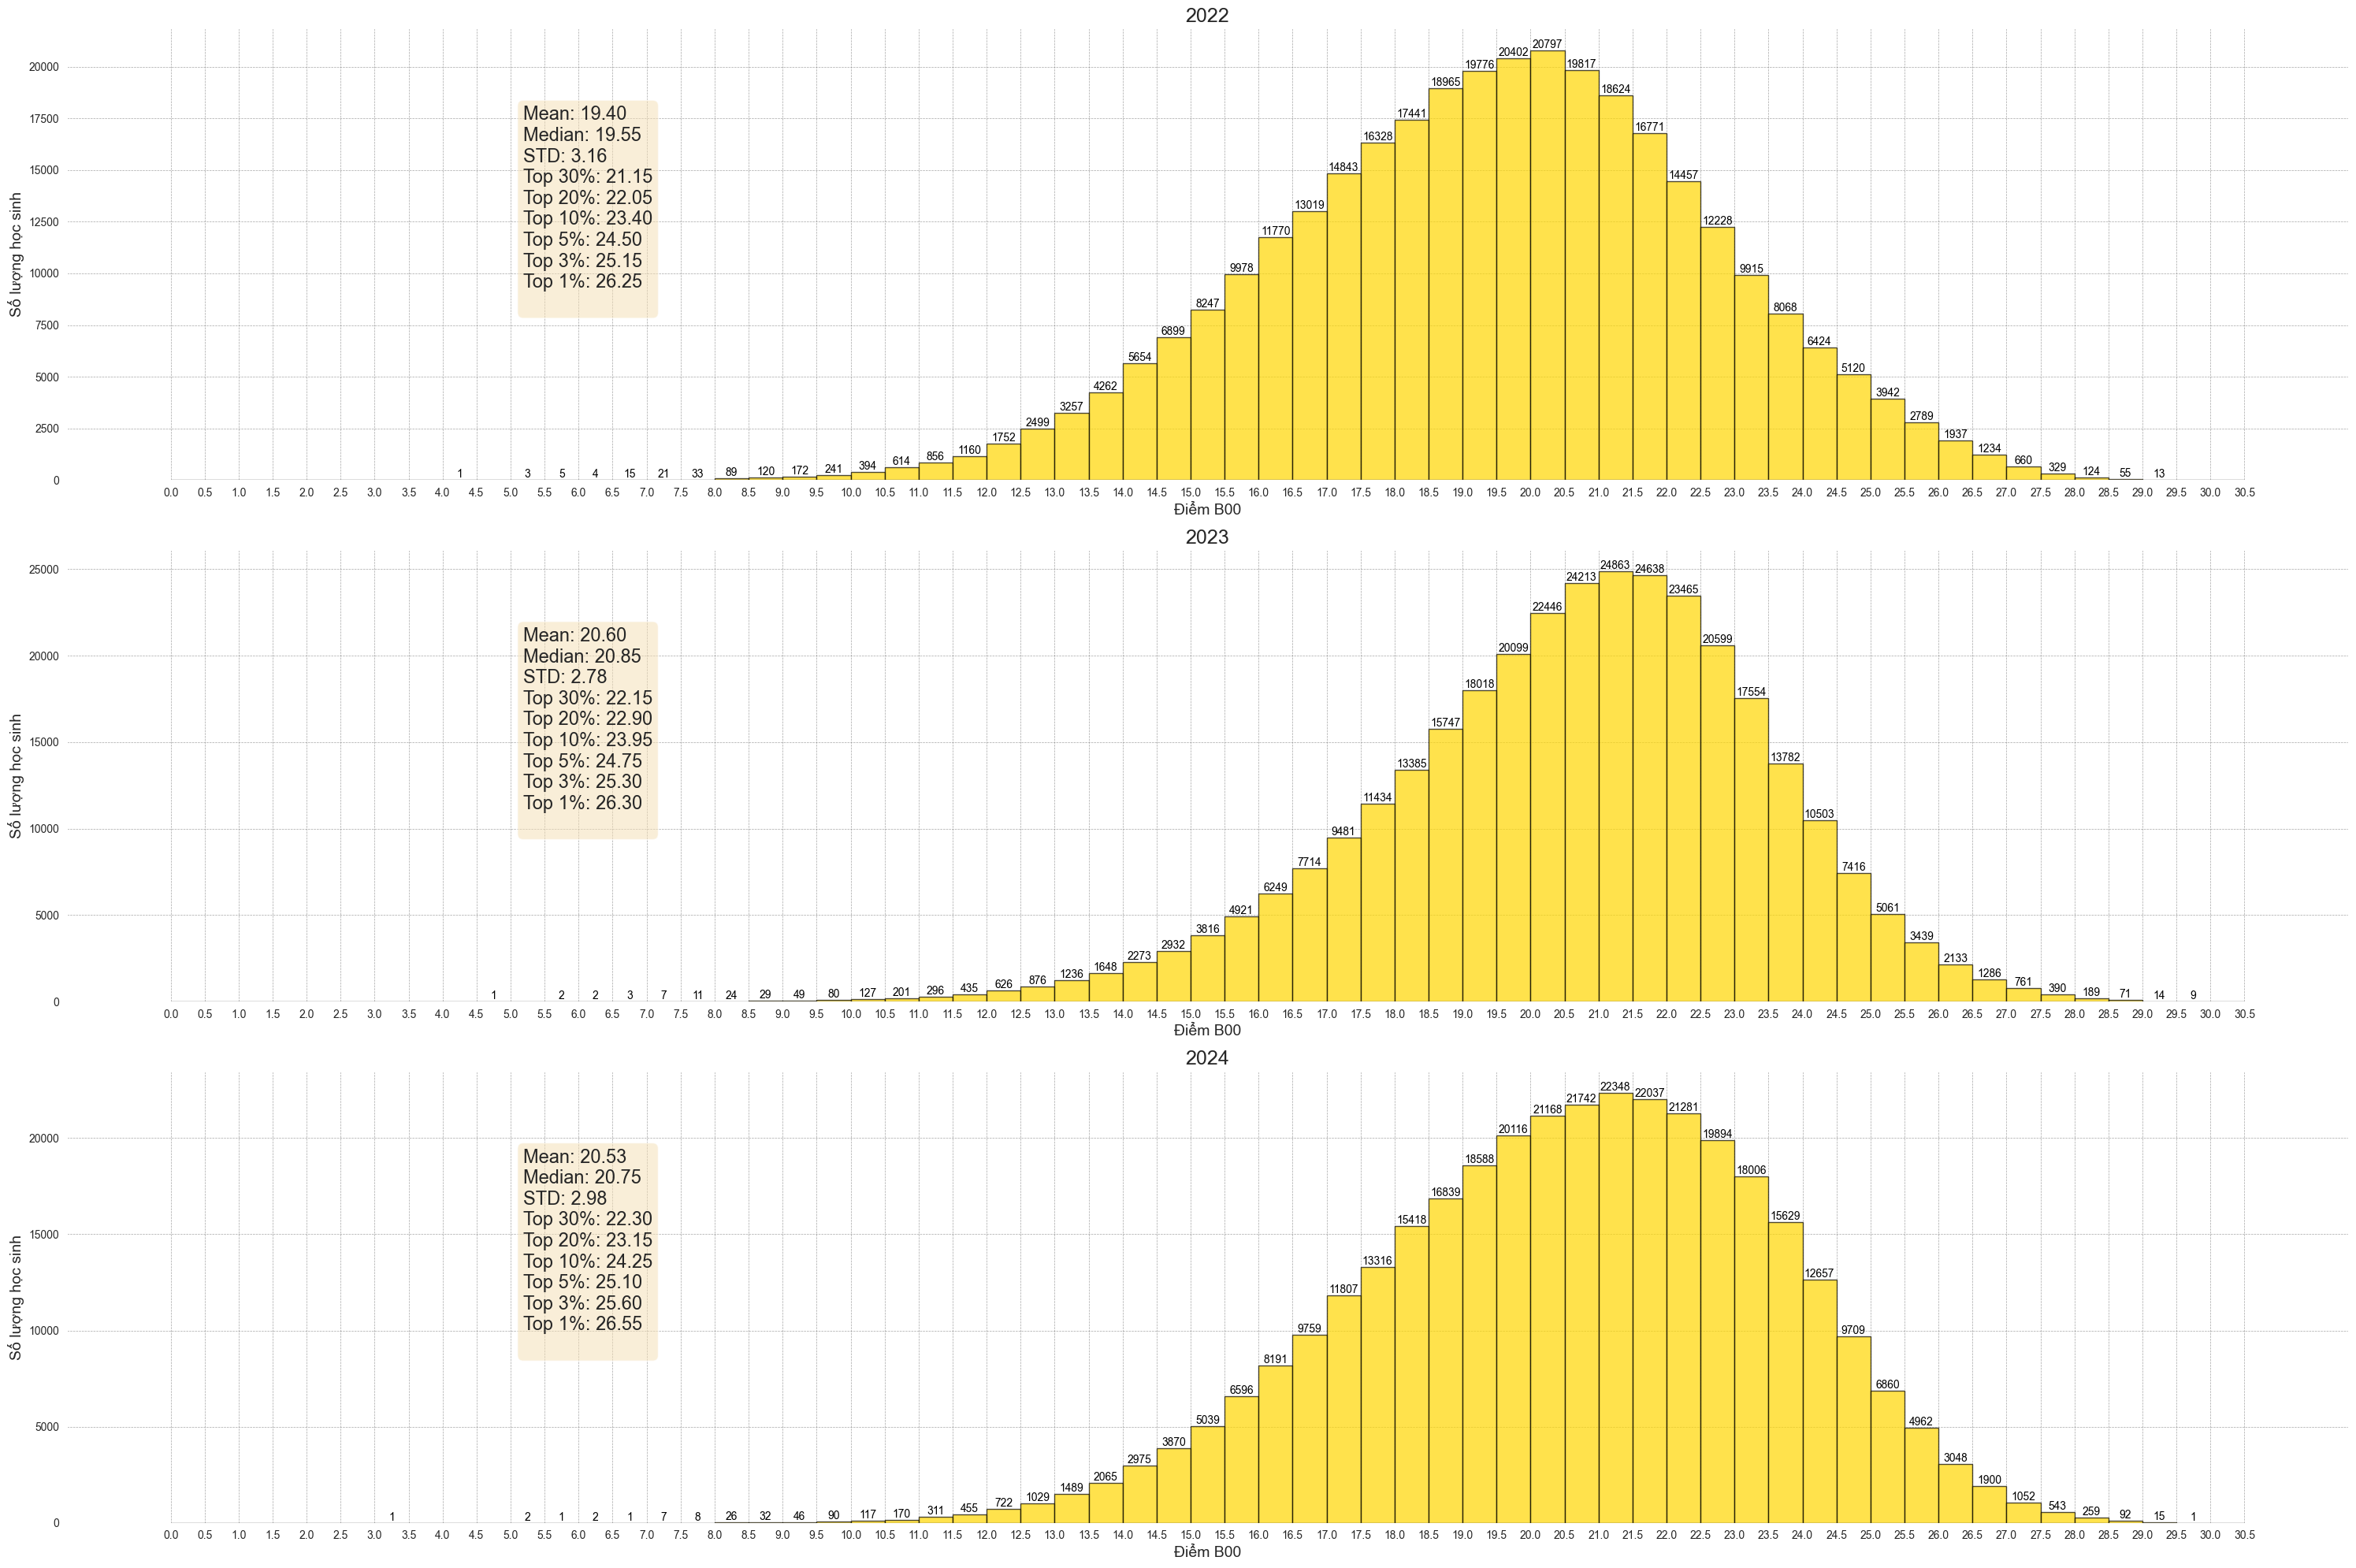

In [7]:
stats_2022 = df_2022['b00'].agg(['mean', 'median', 'var'])
stats_2023 = df_2023['b00'].agg(['mean', 'median', 'var'])
stats_2024 = df_2024['b00'].agg(['mean', 'median', 'var'])
percentiles_2022 = df_2022['b00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2023 = df_2023['b00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2024 = df_2024['b00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])

# bar charts using matplotlib:
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
statistics = [stats_2022, stats_2023, stats_2024]
percentiles_list = [percentiles_2022, percentiles_2023, percentiles_2024]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20), facecolor='white')
fig.patch.set_facecolor('white')

for i, year in enumerate(years):
    df = data_frames[i]
    stats = statistics[i]
    percentiles = percentiles_list[i]
    ax = axes[i]
    ax.set_facecolor('white')

    # plot distribution
    n, bins, patches = ax.hist(df['b00'], bins=np.arange(0, 31, 0.5), edgecolor='black', alpha=0.7, color='gold')
    ax.set_title(f'{year}', fontsize=18)
    ax.set_xlabel('Điểm B00', fontsize=14)
    ax.set_ylabel('Số lượng học sinh', fontsize=14)
    ax.set_xticks(np.arange(0, 31, 0.5))
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    # num of students on bars
    for rect, count in zip(patches, n):
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(count)}', 
                    ha='center', va='bottom', fontsize=10, color='black')

    # legend
    textstr = (
        f"Mean: {stats['mean']:.2f}\n"
        f"Median: {stats['median']:.2f}\n"
        f"STD: {np.sqrt(stats['var']):.2f}\n"
    )
    for pct, score in percentiles.items():
        textstr += f"Top {int((1 - pct) * 100 + 0.00001)}%: {score:.2f}\n"

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.2, 0.6, textstr, transform=ax.transAxes, fontsize=17,
            verticalalignment='center', bbox=props)

plt.tight_layout()
plt.savefig('bar_b00.png', facecolor='white')
plt.show()


## Khối C00: Văn, Sử, Địa

In [8]:
stats_2022 = df_2022['c00'].agg(['mean', 'median', 'var'])
stats_2023 = df_2023['c00'].agg(['mean', 'median', 'var'])
stats_2024 = df_2024['c00'].agg(['mean', 'median', 'var'])
percentiles_2022 = df_2022['c00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2023 = df_2023['c00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2024 = df_2024['c00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])

# bar charts using matplotlib:
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
statistics = [stats_2022, stats_2023, stats_2024]
percentiles_list = [percentiles_2022, percentiles_2023, percentiles_2024]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20), facecolor='white')
fig.patch.set_facecolor('white')

for i, year in enumerate(years):
    df = data_frames[i]
    stats = statistics[i]
    percentiles = percentiles_list[i]
    ax = axes[i]
    ax.set_facecolor('white')

    # plot distribution
    n, bins, patches = ax.hist(df['c00'], bins=np.arange(0, 31, 0.5), edgecolor='black', alpha=0.7, color='gold')
    ax.set_title(f'{year}', fontsize=18)
    ax.set_xlabel('Điểm C00', fontsize=14)
    ax.set_ylabel('Số lượng học sinh', fontsize=14)
    ax.set_xticks(np.arange(0, 31, 0.5))
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    # num of students on bars
    for rect, count in zip(patches, n):
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(count)}', 
                    ha='center', va='bottom', fontsize=10, color='black')

    # legend
    textstr = (
        f"Mean: {stats['mean']:.2f}\n"
        f"Median: {stats['median']:.2f}\n"
        f"STD: {np.sqrt(stats['var']):.2f}\n"
    )
    for pct, score in percentiles.items():
        textstr += f"Top {int((1 - pct) * 100 + 0.00001)}%: {score:.2f}\n"

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.2, 0.6, textstr, transform=ax.transAxes, fontsize=17,
            verticalalignment='center', bbox=props)

plt.tight_layout()
plt.savefig('bar_c00.png', facecolor='white')
plt.show()

## Khối D00: Toán, Văn, Anh

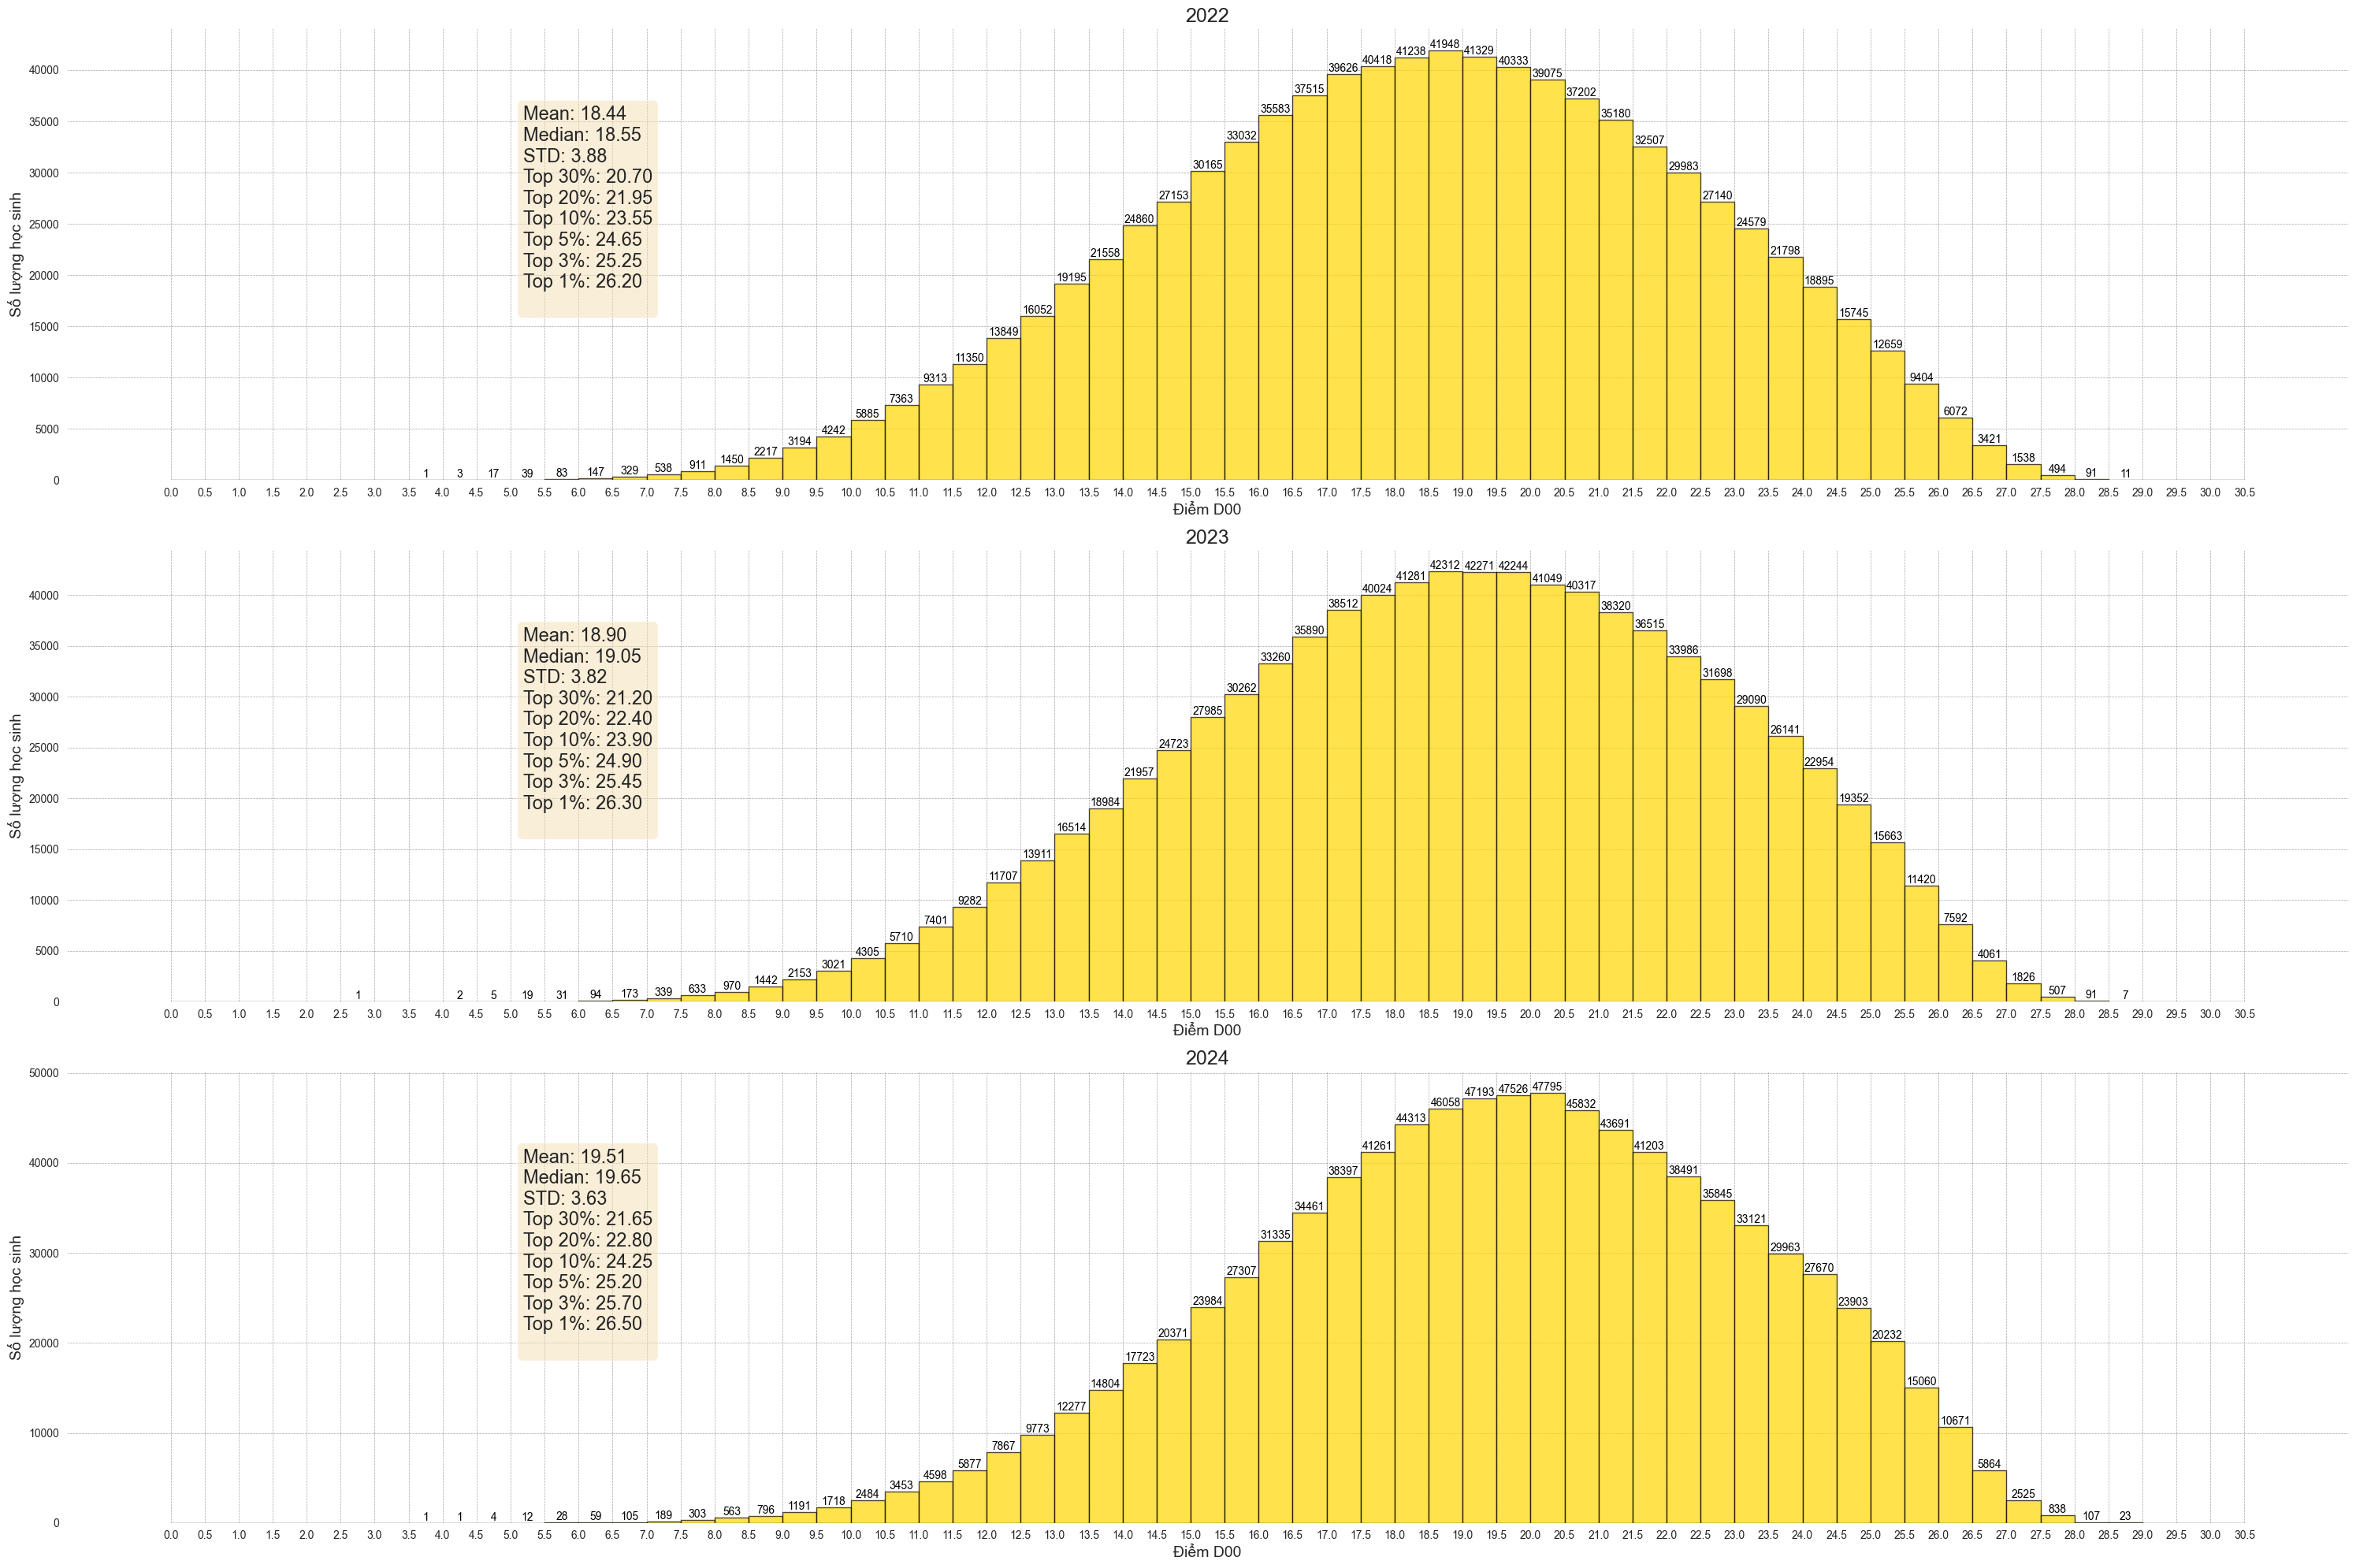

In [9]:
stats_2022 = df_2022['d00'].agg(['mean', 'median', 'var'])
stats_2023 = df_2023['d00'].agg(['mean', 'median', 'var'])
stats_2024 = df_2024['d00'].agg(['mean', 'median', 'var'])
percentiles_2022 = df_2022['d00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2023 = df_2023['d00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2024 = df_2024['d00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])

# bar charts using matplotlib:
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
statistics = [stats_2022, stats_2023, stats_2024]
percentiles_list = [percentiles_2022, percentiles_2023, percentiles_2024]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20), facecolor='white')
fig.patch.set_facecolor('white')

for i, year in enumerate(years):
    df = data_frames[i]
    stats = statistics[i]
    percentiles = percentiles_list[i]
    ax = axes[i]
    ax.set_facecolor('white')

    # plot distribution
    n, bins, patches = ax.hist(df['d00'], bins=np.arange(0, 31, 0.5), edgecolor='black', alpha=0.7, color='gold')
    ax.set_title(f'{year}', fontsize=18)
    ax.set_xlabel('Điểm D00', fontsize=14)
    ax.set_ylabel('Số lượng học sinh', fontsize=14)
    ax.set_xticks(np.arange(0, 31, 0.5))
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    # num of students on bars
    for rect, count in zip(patches, n):
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(count)}', 
                    ha='center', va='bottom', fontsize=10, color='black')

    # legend
    textstr = (
        f"Mean: {stats['mean']:.2f}\n"
        f"Median: {stats['median']:.2f}\n"
        f"STD: {np.sqrt(stats['var']):.2f}\n"
    )
    for pct, score in percentiles.items():
        textstr += f"Top {int((1 - pct) * 100 + 0.00001)}%: {score:.2f}\n"

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.2, 0.6, textstr, transform=ax.transAxes, fontsize=17,
            verticalalignment='center', bbox=props)

plt.tight_layout()
plt.savefig('bar_d00.png', facecolor='white')
plt.show()

# Biểu đồ đường phân bố điểm từng khối:

## Khối A00: Toán, Lý, Hóa

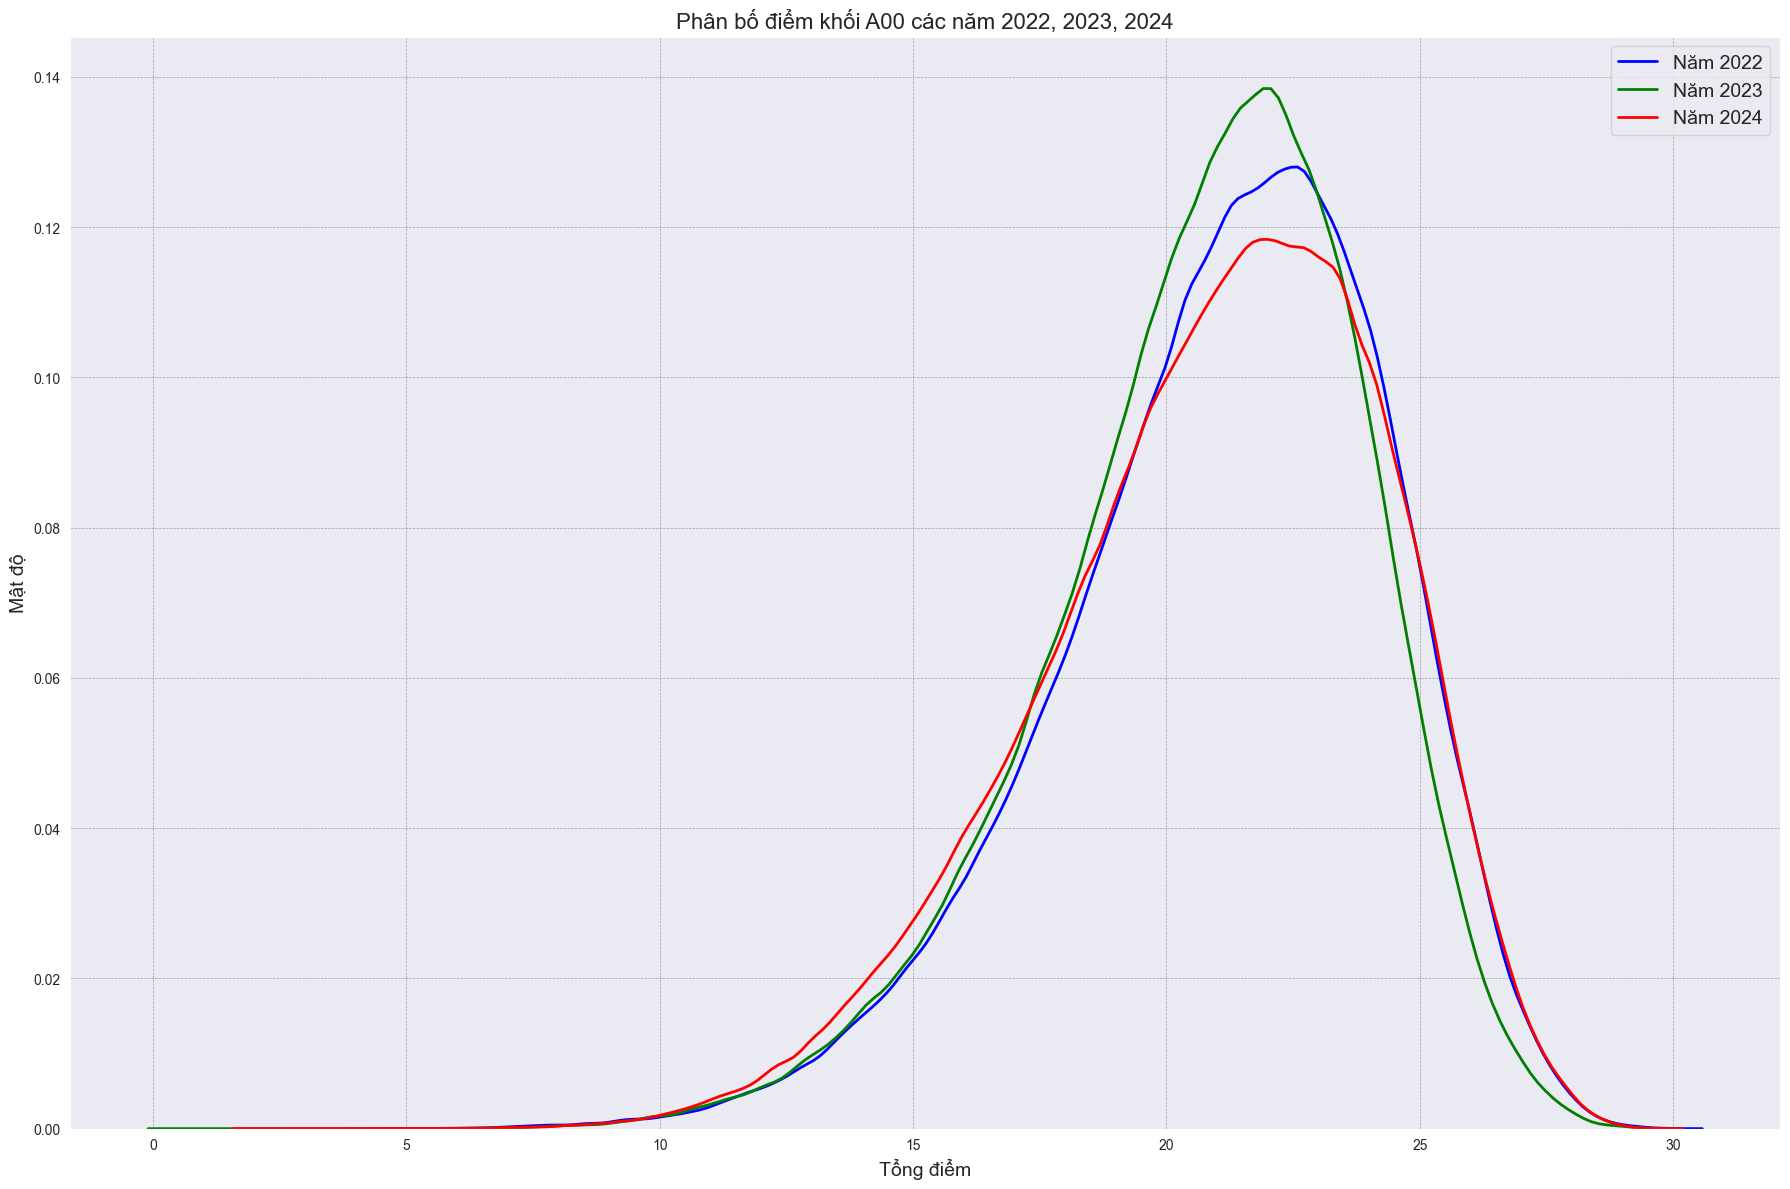

In [30]:
plt.figure(figsize=(18, 12))
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
colors = ['b', 'g', 'r']

# KDE with Seaborn 
for i, year in enumerate(years):
    df = data_frames[i]
    sns.kdeplot(df['a00'], bw_adjust=0.75, label=f'Năm {year}', color=colors[i], linewidth=2)

# legend
plt.title('Phân bố điểm khối A00 các năm 2022, 2023, 2024', fontsize=16)
plt.xlabel('Tổng điểm', fontsize=14)
plt.ylabel('Mật độ', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('kde_a00.png', facecolor='white')
plt.show()


## Khối A01: Toán, Lý, Anh

In [33]:
plt.figure(figsize=(18, 12))
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
colors = ['b', 'g', 'r']

# KDE with Seaborn 
for i, year in enumerate(years):
    df = data_frames[i]
    sns.kdeplot(df['a01'], bw_adjust=0.75, label=f'Năm {year}', color=colors[i], linewidth=2)

# legend
plt.title('Phân bố điểm khối A01 các năm 2022, 2023, 2024', fontsize=16)
plt.xlabel('Tổng điểm', fontsize=14)
plt.ylabel('Mật độ', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('kde_a01.png', facecolor='white')
plt.show()


## Khối B00: Toán, Hóa, Sinh

In [34]:
plt.figure(figsize=(18, 12))
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
colors = ['b', 'g', 'r']

# KDE with Seaborn 
for i, year in enumerate(years):
    df = data_frames[i]
    sns.kdeplot(df['b00'], bw_adjust=0.75, label=f'Năm {year}', color=colors[i], linewidth=2)

# legend
plt.title('Phân bố điểm khối B00 các năm 2022, 2023, 2024', fontsize=16)
plt.xlabel('Tổng điểm', fontsize=14)
plt.ylabel('Mật độ', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('kde_b00.png', facecolor='white')
plt.show()


## Khối C00: Văn, Sử, Địa

In [35]:
plt.figure(figsize=(18, 12))
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
colors = ['b', 'g', 'r']

# KDE with Seaborn 
for i, year in enumerate(years):
    df = data_frames[i]
    sns.kdeplot(df['c00'], bw_adjust=0.75, label=f'Năm {year}', color=colors[i], linewidth=2)

# legend
plt.title('Phân bố điểm khối C00 các năm 2022, 2023, 2024', fontsize=16)
plt.xlabel('Tổng điểm', fontsize=14)
plt.ylabel('Mật độ', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('kde_c00.png', facecolor='white')
plt.show()


## Khối D00: Toán, Văn, Anh

In [36]:
plt.figure(figsize=(18, 12))
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
colors = ['b', 'g', 'r']

# KDE with Seaborn 
for i, year in enumerate(years):
    df = data_frames[i]
    sns.kdeplot(df['d00'], bw_adjust=0.75, label=f'Năm {year}', color=colors[i], linewidth=2)

# legend
plt.title('Phân bố điểm khối D00 các năm 2022, 2023, 2024', fontsize=16)
plt.xlabel('Tổng điểm', fontsize=14)
plt.ylabel('Mật độ', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('kde_d00.png', facecolor='white')
plt.show()


# Biểu đồ cột lồng nhau, biểu diễn số lượng thí sinh trong các khung điểm của từng khối:

## Khối A00: Toán, Lý, Hóa

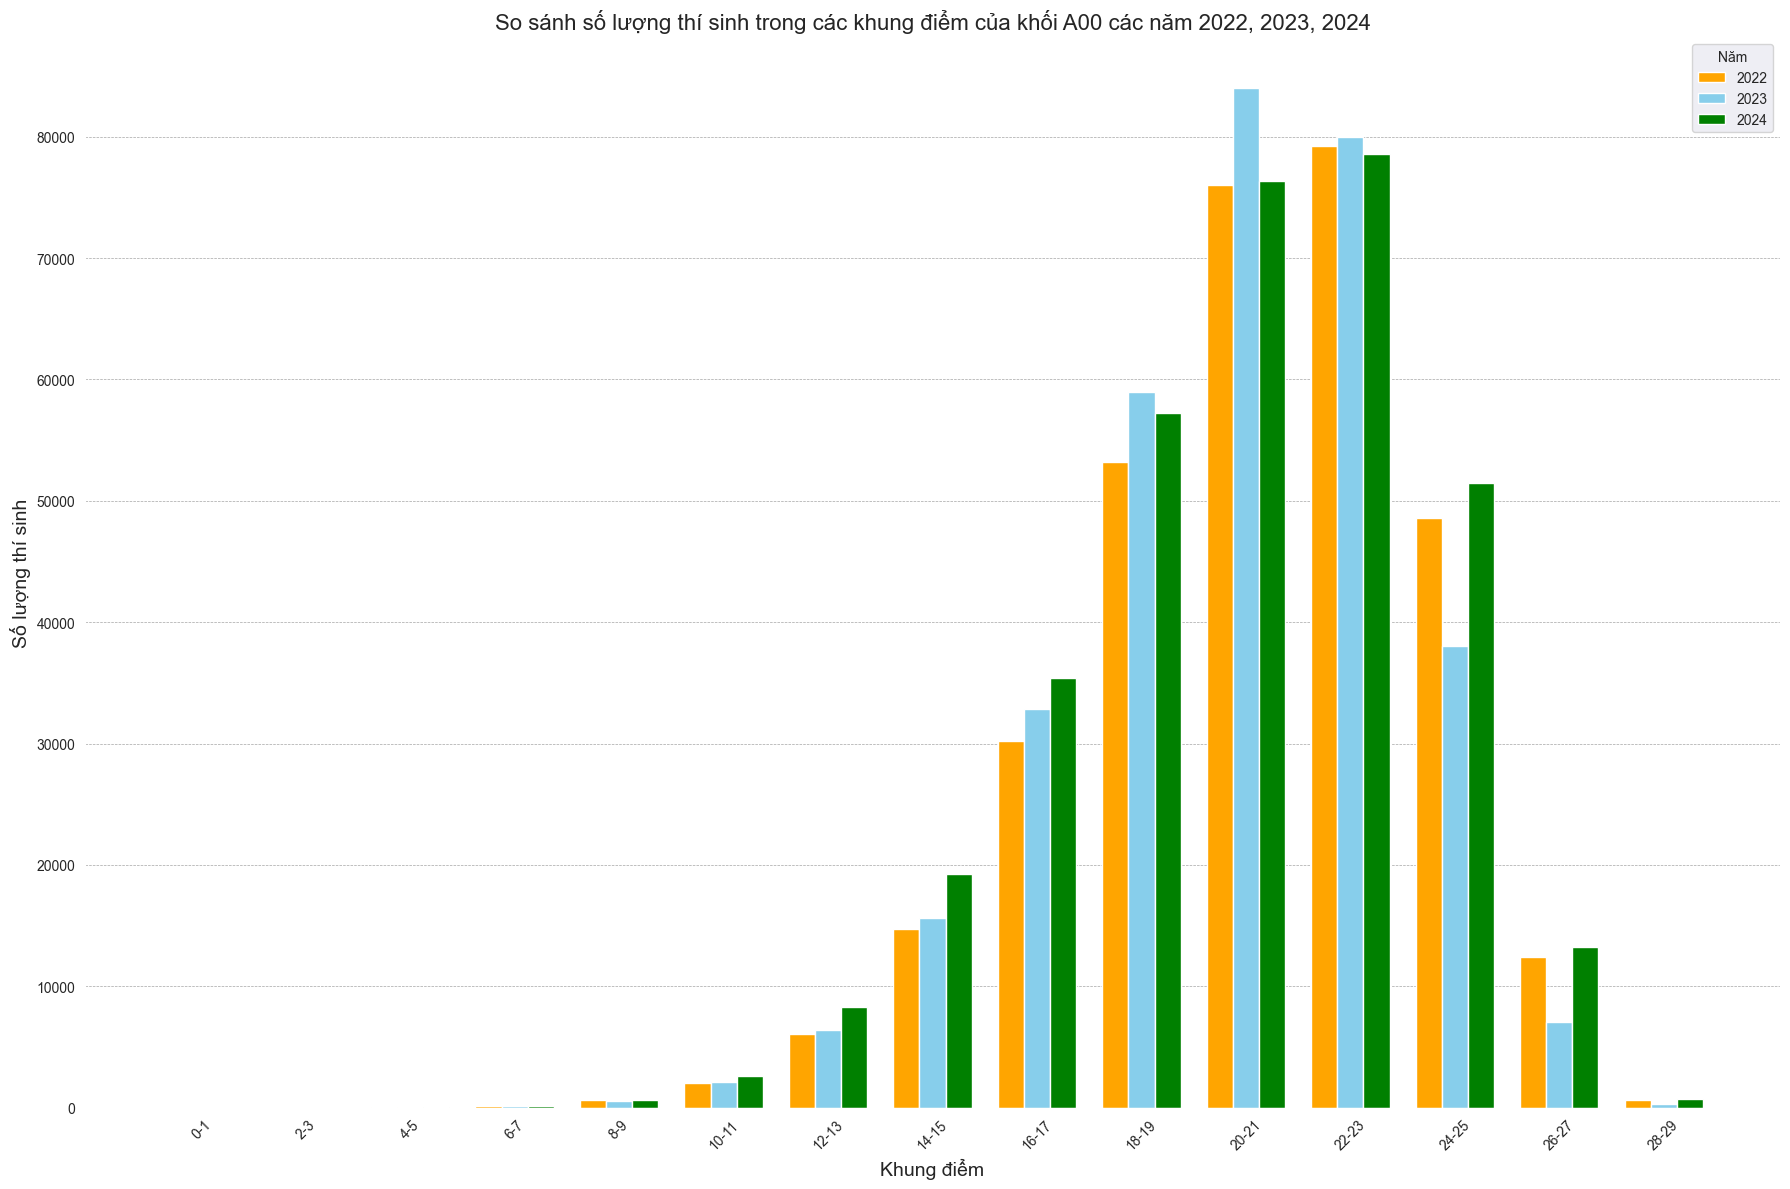

In [20]:
bins = np.arange(0, 31, 2)
score_labels = [f'{bins[i]}-{bins[i+1] - 1}' for i in range(len(bins) - 1)]

# func to calculate count per bin
def calculate_bin_counts(df, bins):
    counts, _ = np.histogram(df['a00'], bins=bins)
    return counts

bin_counts_2022 = calculate_bin_counts(df_2022, bins)
bin_counts_2023 = calculate_bin_counts(df_2023, bins)
bin_counts_2024 = calculate_bin_counts(df_2024, bins)


fig, ax = plt.subplots(figsize=(18, 12), facecolor='white')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
x = np.arange(len(score_labels))
width = 0.25

# side by side plot
ax.bar(x - width, bin_counts_2022, width=width, label='2022', color='orange')
ax.bar(x, bin_counts_2023, width=width, label='2023', color='skyblue')
ax.bar(x + width, bin_counts_2024, width=width, label='2024', color='green')

# labeling
ax.set_xticks(x)
ax.set_xticklabels(score_labels, rotation=45)
ax.set_xlabel('Khung điểm', fontsize=14)
ax.set_ylabel('Số lượng thí sinh', fontsize=14)
ax.set_title('So sánh số lượng thí sinh trong các khung điểm của khối A00 các năm 2022, 2023, 2024', fontsize=16)
ax.legend(title='Năm')
ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('gbc_a00.png', facecolor='white')
plt.show()


## Khối A01: Toán, Lý, Anh

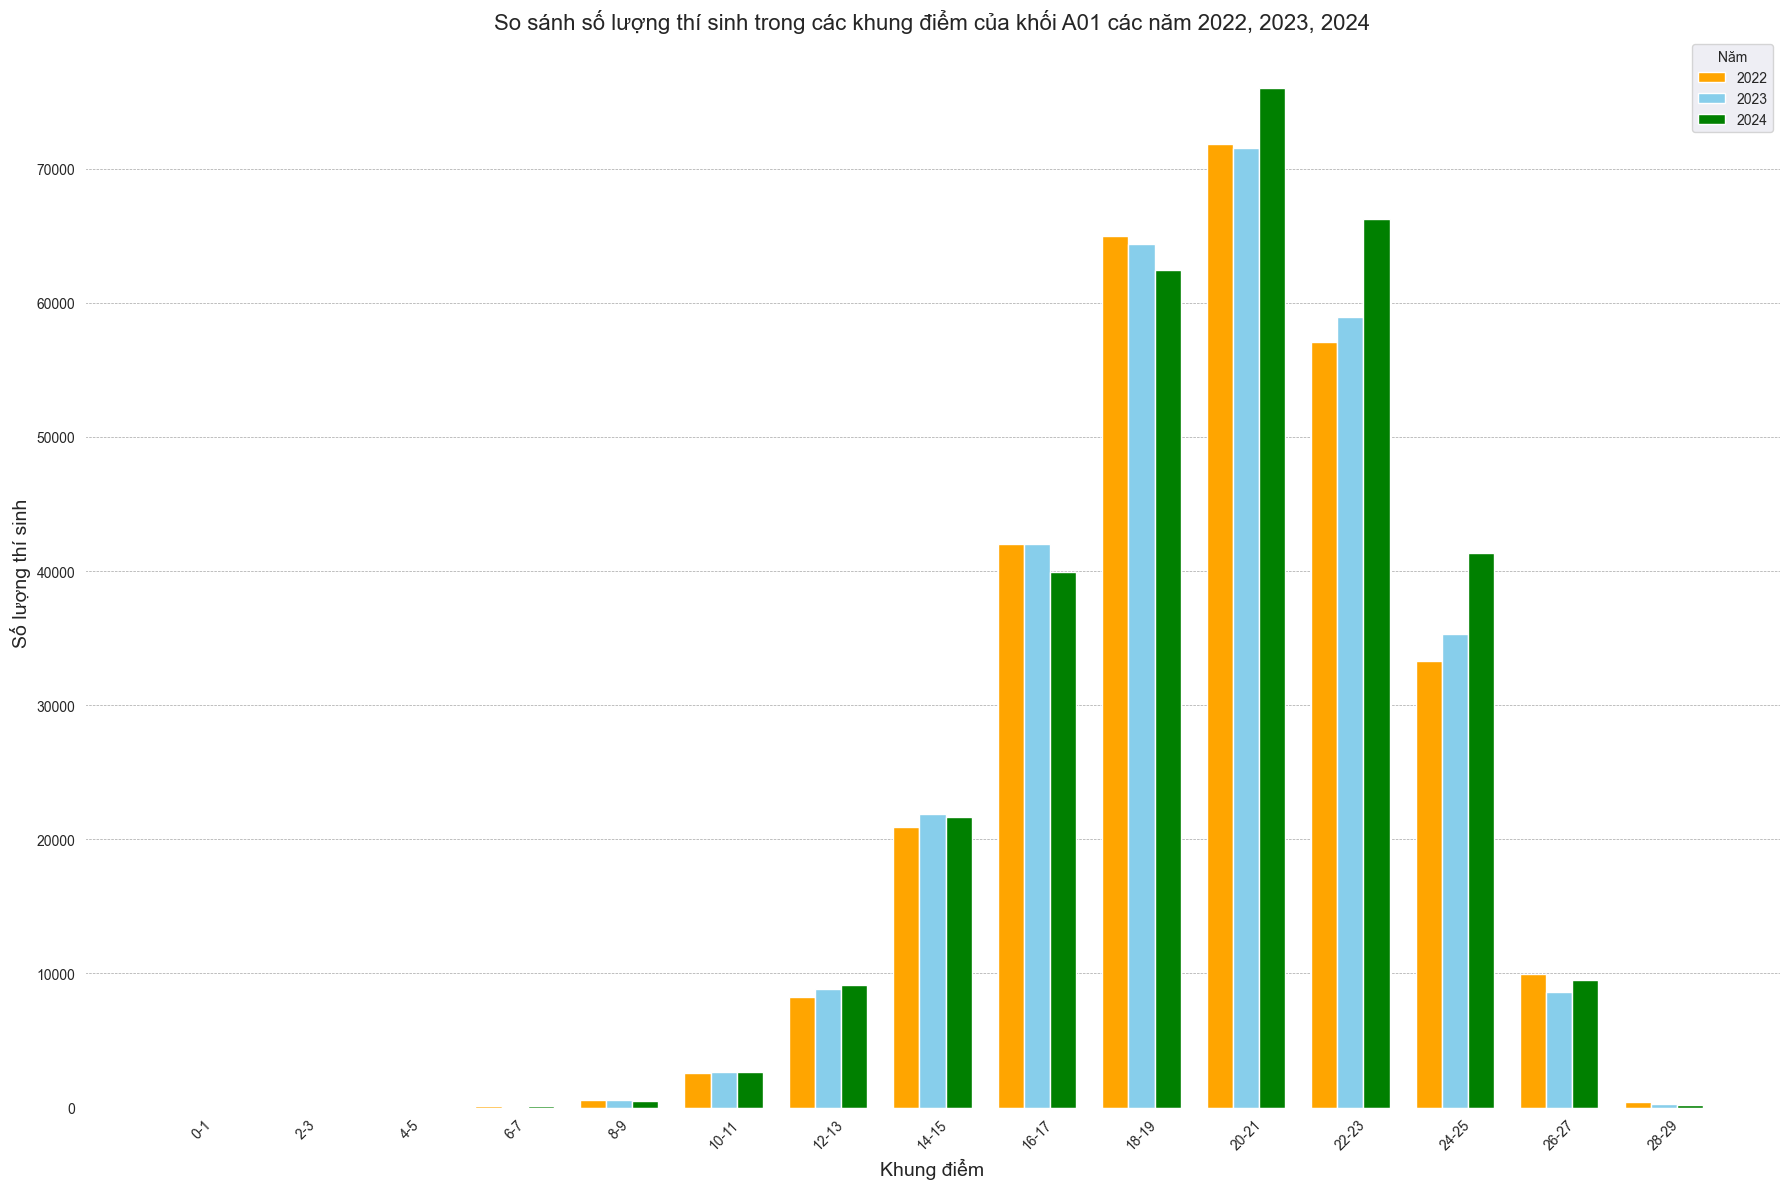

In [21]:
bins = np.arange(0, 31, 2)
score_labels = [f'{bins[i]}-{bins[i+1] - 1}' for i in range(len(bins) - 1)]

# func to calculate count per bin
def calculate_bin_counts(df, bins):
    counts, _ = np.histogram(df['a01'], bins=bins)
    return counts

bin_counts_2022 = calculate_bin_counts(df_2022, bins)
bin_counts_2023 = calculate_bin_counts(df_2023, bins)
bin_counts_2024 = calculate_bin_counts(df_2024, bins)


fig, ax = plt.subplots(figsize=(18, 12), facecolor='white')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
x = np.arange(len(score_labels))
width = 0.25

# side by side plot
ax.bar(x - width, bin_counts_2022, width=width, label='2022', color='orange')
ax.bar(x, bin_counts_2023, width=width, label='2023', color='skyblue')
ax.bar(x + width, bin_counts_2024, width=width, label='2024', color='green')

# labeling
ax.set_xticks(x)
ax.set_xticklabels(score_labels, rotation=45)
ax.set_xlabel('Khung điểm', fontsize=14)
ax.set_ylabel('Số lượng thí sinh', fontsize=14)
ax.set_title('So sánh số lượng thí sinh trong các khung điểm của khối A01 các năm 2022, 2023, 2024', fontsize=16)
ax.legend(title='Năm')
ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('gbc_a01.png', facecolor='white')
plt.show()


## Khối B00: Toán, Hóa, Sinh

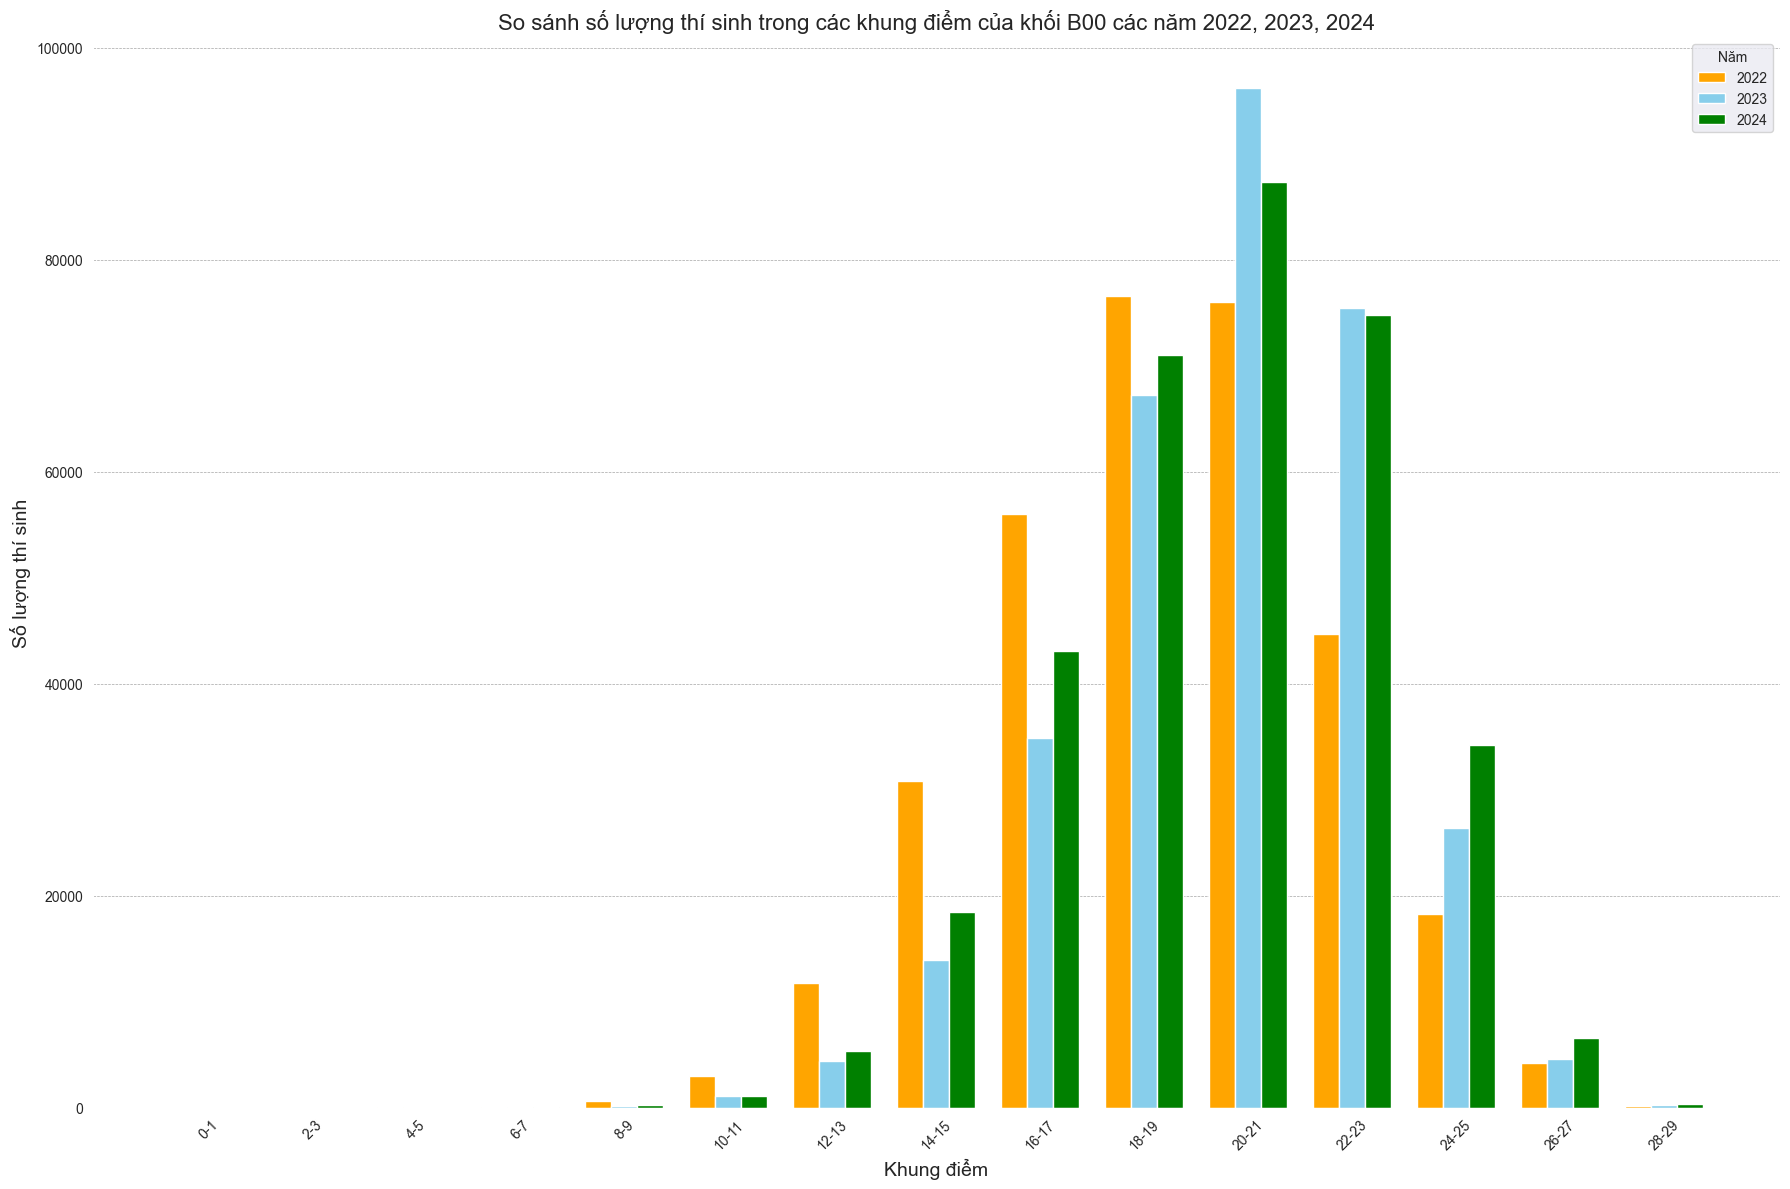

In [22]:
bins = np.arange(0, 31, 2)
score_labels = [f'{bins[i]}-{bins[i+1] - 1}' for i in range(len(bins) - 1)]

# func to calculate count per bin
def calculate_bin_counts(df, bins):
    counts, _ = np.histogram(df['b00'], bins=bins)
    return counts

bin_counts_2022 = calculate_bin_counts(df_2022, bins)
bin_counts_2023 = calculate_bin_counts(df_2023, bins)
bin_counts_2024 = calculate_bin_counts(df_2024, bins)


fig, ax = plt.subplots(figsize=(18, 12), facecolor='white')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
x = np.arange(len(score_labels))
width = 0.25

# side by side plot
ax.bar(x - width, bin_counts_2022, width=width, label='2022', color='orange')
ax.bar(x, bin_counts_2023, width=width, label='2023', color='skyblue')
ax.bar(x + width, bin_counts_2024, width=width, label='2024', color='green')

# labeling
ax.set_xticks(x)
ax.set_xticklabels(score_labels, rotation=45)
ax.set_xlabel('Khung điểm', fontsize=14)
ax.set_ylabel('Số lượng thí sinh', fontsize=14)
ax.set_title('So sánh số lượng thí sinh trong các khung điểm của khối B00 các năm 2022, 2023, 2024', fontsize=16)
ax.legend(title='Năm')
ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('gbc_b00.png', facecolor='white')
plt.show()


## Khối C00: Văn, Sử, Địa

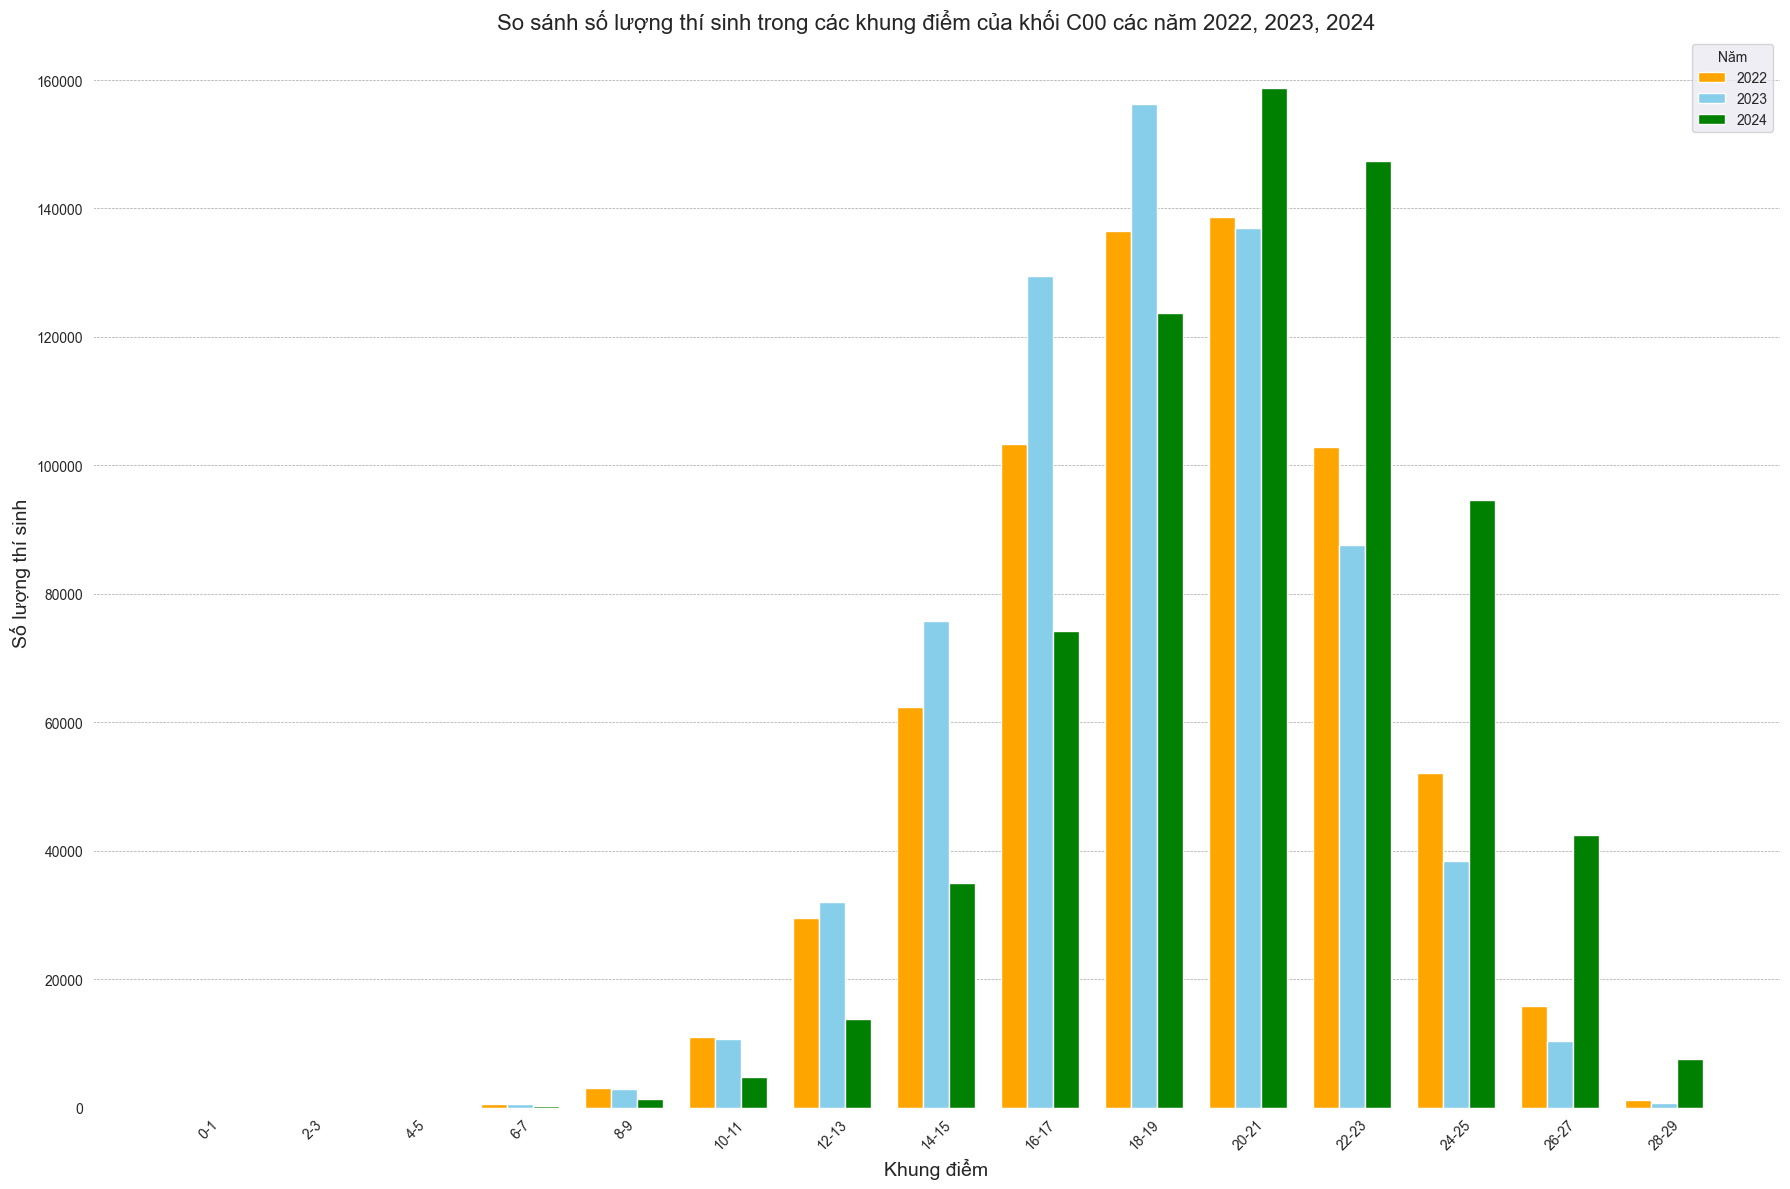

In [23]:
bins = np.arange(0, 31, 2)
score_labels = [f'{bins[i]}-{bins[i+1] - 1}' for i in range(len(bins) - 1)]

# func to calculate count per bin
def calculate_bin_counts(df, bins):
    counts, _ = np.histogram(df['c00'], bins=bins)
    return counts

bin_counts_2022 = calculate_bin_counts(df_2022, bins)
bin_counts_2023 = calculate_bin_counts(df_2023, bins)
bin_counts_2024 = calculate_bin_counts(df_2024, bins)


fig, ax = plt.subplots(figsize=(18, 12), facecolor='white')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
x = np.arange(len(score_labels))
width = 0.25

# side by side plot
ax.bar(x - width, bin_counts_2022, width=width, label='2022', color='orange')
ax.bar(x, bin_counts_2023, width=width, label='2023', color='skyblue')
ax.bar(x + width, bin_counts_2024, width=width, label='2024', color='green')

# labeling
ax.set_xticks(x)
ax.set_xticklabels(score_labels, rotation=45)
ax.set_xlabel('Khung điểm', fontsize=14)
ax.set_ylabel('Số lượng thí sinh', fontsize=14)
ax.set_title('So sánh số lượng thí sinh trong các khung điểm của khối C00 các năm 2022, 2023, 2024', fontsize=16)
ax.legend(title='Năm')
ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('gbc_c00.png', facecolor='white')
plt.show()


## Khối D00: Toán, Văn, Anh

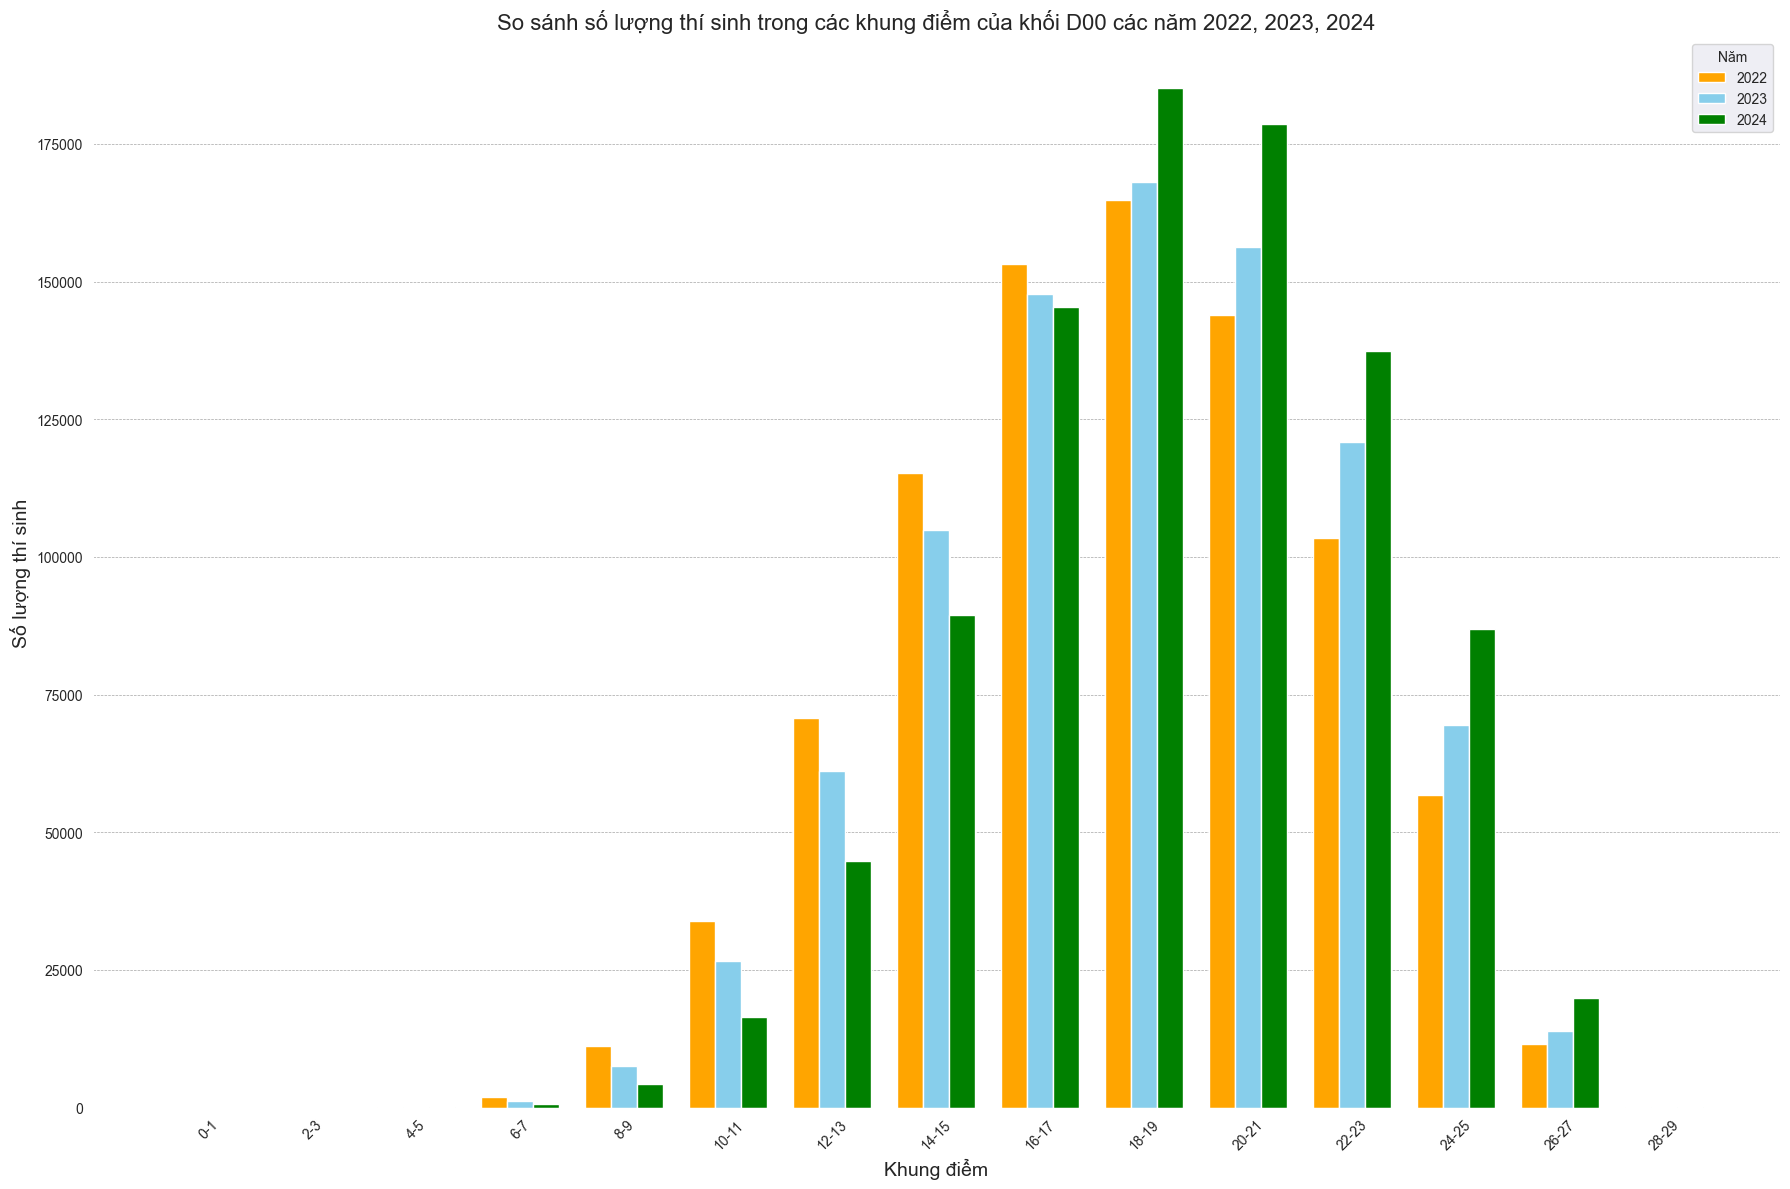

In [38]:
bins = np.arange(0, 31, 2)
score_labels = [f'{bins[i]}-{bins[i+1] - 1}' for i in range(len(bins) - 1)]

# func to calculate count per bin
def calculate_bin_counts(df, bins):
    counts, _ = np.histogram(df['d00'], bins=bins)
    return counts

bin_counts_2022 = calculate_bin_counts(df_2022, bins)
bin_counts_2023 = calculate_bin_counts(df_2023, bins)
bin_counts_2024 = calculate_bin_counts(df_2024, bins)


fig, ax = plt.subplots(figsize=(18, 12), facecolor='white')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
x = np.arange(len(score_labels))
width = 0.25

# side by side plot
ax.bar(x - width, bin_counts_2022, width=width, label='2022', color='orange')
ax.bar(x, bin_counts_2023, width=width, label='2023', color='skyblue')
ax.bar(x + width, bin_counts_2024, width=width, label='2024', color='green')

# labeling
ax.set_xticks(x)
ax.set_xticklabels(score_labels, rotation=45)
ax.set_xlabel('Khung điểm', fontsize=14)
ax.set_ylabel('Số lượng thí sinh', fontsize=14)
ax.set_title('So sánh số lượng thí sinh trong các khung điểm của khối D00 các năm 2022, 2023, 2024', fontsize=16)
ax.legend(title='Năm')
ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('gbc_d00.png', facecolor='white')
plt.show()



# Correlation matrix 

### Thực ra thì là nhiều cái heatmap đặt cạnh nhau thôi 

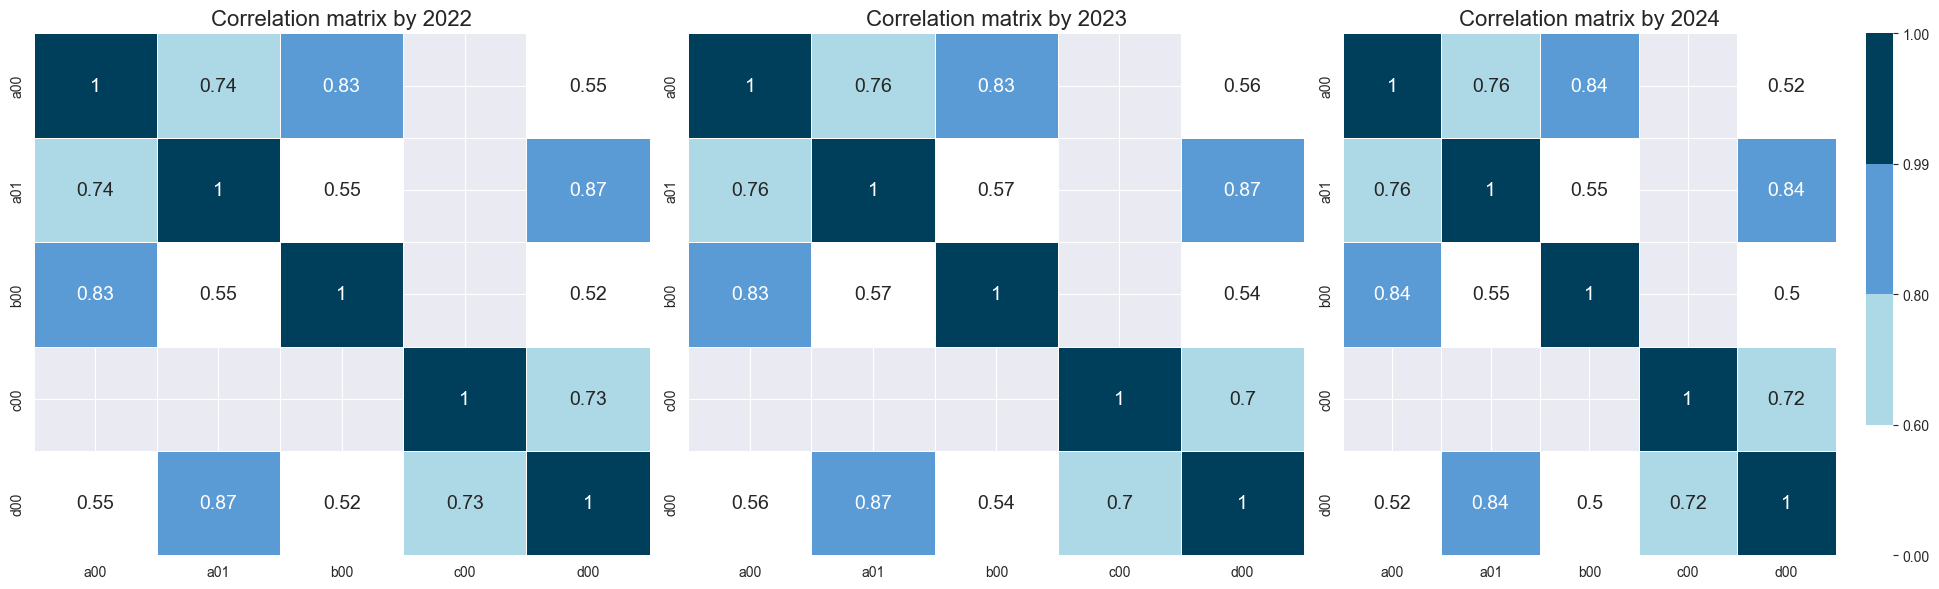

In [63]:
from matplotlib.colors import ListedColormap, BoundaryNorm

years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
selected_columns = ['a00', 'a01', 'b00', 'c00', 'd00']
colors = ['white', '#add8e6', '#5b9bd5', '#003f5c']  # light medium dark blues
cmap = ListedColormap(colors)
bounds = [0, 0.6, 0.8, 0.99, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, year in enumerate(years):
    selected_df = data_frames[i][selected_columns]
    corr_matrix = selected_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, norm=norm, ax=axes[i], cbar=(i == 2), linewidths=0.5, linecolor='white', annot_kws={"size": 14})
    axes[i].set_title(f'Correlation matrix by {year}', fontsize=16)

plt.subplots_adjust(wspace=1.5, hspace=0.75)
plt.tight_layout()
plt.savefig('CorrelationMatrix.png', facecolor='white')
plt.show()
